In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
# Let's try to cover a sphere with pentagons and hexagons

# Where are the centers of the faces of a regular dodecahedron?
# https://en.wikipedia.org/wiki/Regular_dodecahedron
# OK, I think I want to contain 1/12 of the area of the sphere, and have 72 degrees between everything.

# A helpful image here: https://math.stackexchange.com/questions/2029958/numbering-a-spherical-grid-of-pentagons-and-hexagons-so-neighbours-are-easily


# I think I need to put a pentagon at the pole, and then a ring of 5 at some latitude.
# So, an opening angle of 72 degrees.
# let's make 
n_between = 11


In [3]:
golden = (1. + 5.**.5)/2.

In [4]:
golden

1.618033988749895

In [5]:
# Here's how far to put the ring of pentagons up/down from the poles.
side_length = np.arccos(0.5)#np.arccos(2./3.)
np.degrees(side_length)

59.999999999999993

In [6]:
#fifth = 2.*np.pi/5.
#declinations = np.pi/2.-(np.arange(1, n_between+1)/n_between * side_length)

In [7]:
#np.degrees(declinations)

In [8]:
# I need to know how big my pentagons are relative to my hexagons. 
        

In [9]:
np.arange(0)

array([], dtype=int64)

In [10]:
# Center of pentagon to edge = (1 + 5**.5)/4 = golden/2 * L
# https://en.wikipedia.org/wiki/Hexagon
# center of hexagon to edge = cos(30)*L
# Where they share side length L

# So, how do we map side length to arc length? 
total_length = golden + 2.*n_between*np.cos(np.pi/6.)

In [11]:
poly_side = side_length/total_length

In [12]:
np.degrees(poly_side)

2.9026743631167431

In [13]:
declinations = np.pi/2. - (np.arange(n_between)*np.cos(np.pi/6.)*poly_side*2 + golden/2.*poly_side+np.cos(np.pi/6.)*poly_side)

In [14]:
declinations = declinations.tolist()
# Add the other pentagon point
declinations.append(np.pi/2. - side_length)


In [15]:
np.degrees(declinations)

array([ 85.13789737,  80.1103179 ,  75.08273842,  70.05515895,
        65.02757947,  60.        ,  54.97242053,  49.94484105,
        44.91726158,  39.8896821 ,  34.86210263,  30.        ])

In [45]:
# ok, for each declination, need to divide up the 72 degrees.
ras = []
decs = []
new_ras = None
ra_lol = []
# Have to do something special around the pentagon
for i, dec in enumerate(declinations[:-1]):
    last_ras = new_ras
    new_ras = np.arange(i+2)/(i+1)*np.pi*2/5.
    ra_lol.append(new_ras)
    for ra in new_ras[:-1]:
        decs.append(dec)
        ras.append(ra)
    


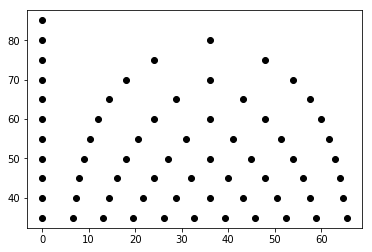

In [17]:
plt.plot(np.degrees(ras), np.degrees(decs), 'ko')

In [18]:
# Currently, declinations go from 30 to 90, with 60 as midpoint. 
# Should go 0 to 72, midpoint of 36

#longitudes = (np.arange(n_between)*np.cos(np.pi/6.)*poly_side*2 + golden/2.*poly_side+np.cos(np.pi/6.)*poly_side)/np.cos(np.pi/2 - side_length)
#longitudes = [0] + longitudes.tolist()

longitudes = (np.arange(n_between)*np.cos(np.pi/6.)*poly_side*2 + golden/2.*poly_side+np.cos(np.pi/6.)*poly_side).tolist()
#longitudes = [0] + longitudes
longitudes = np.array(longitudes) * 36./30.

# I want the ratio of the pentagon length to the hexagon length
#penta_length = golden/2 *2
#hexa_length = np.cos(np.pi/6.)*2*n_between

#fifth = 2.*np.pi/5

# OK, the middle point needs to end up at 36 degrees.
#longitudes = ((np.arange(n_between)/(n_between-1)-.5)*hexa_length/(hexa_length+penta_length)+np.pi/5.) #*poly_side*np.cos(np.pi/6.) + 2.*np.pi/5.

# Let's take the longitudes from one up, and then add on either side
np.degrees(longitudes)
#longitudes

array([  5.83452315,  11.86761852,  17.90071389,  23.93380926,
        29.96690463,  36.        ,  42.03309537,  48.06619074,
        54.09928611,  60.13238148,  66.16547685])

In [19]:
np.degrees(last_ras[1:])

array([  7.2,  14.4,  21.6,  28.8,  36. ,  43.2,  50.4,  57.6,  64.8,  72. ])

In [20]:
for lon in longitudes:
    decs.append(np.pi/2. - side_length)
    ras.append(lon)

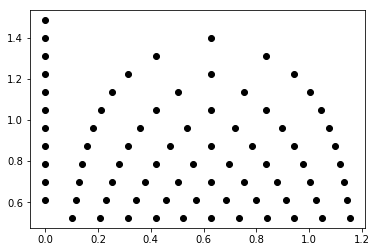

In [21]:
plt.plot(ras, decs, 'ko')

In [23]:
# now to fill in the points that make the triangle going down to 36, -30)
#declinations = 

# The RAs of the strip should be centered on 36 degrees

In [42]:
new_declinations = -1*(np.array(declinations)[:-1] - np.pi/2. + side_length) +np.pi/2 - side_length
np.degrees(new_declinations)

array([-25.13789737, -20.1103179 , -15.08273842, -10.05515895,
        -5.02757947,   0.        ,   5.02757947,  10.05515895,
        15.08273842,  20.1103179 ,  25.13789737])

In [53]:
np.array(ra_lol)*180/np.pi

array([array([  0.,  72.]), array([  0.,  36.,  72.]),
       array([  0.,  24.,  48.,  72.]),
       array([  0.,  18.,  36.,  54.,  72.]),
       array([  0. ,  14.4,  28.8,  43.2,  57.6,  72. ]),
       array([  0.,  12.,  24.,  36.,  48.,  60.,  72.]),
       array([  0.        ,  10.28571429,  20.57142857,  30.85714286,
        41.14285714,  51.42857143,  61.71428571,  72.        ]),
       array([  0.,   9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.]),
       array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.]),
       array([  0. ,   7.2,  14.4,  21.6,  28.8,  36. ,  43.2,  50.4,  57.6,
        64.8,  72. ]),
       array([  0.        ,   6.54545455,  13.09090909,  19.63636364,
        26.18181818,  32.72727273,  39.27272727,  45.81818182,
        52.36363636,  58.90909091,  65.45454545,  72.        ])], dtype=object)

In [ ]:
# ok, for each declination, need to divide up the 72 degrees.
#ras = []

# Before, we went from ra 0 to 72. Now we have a midpoint RA of 36, and the ra span will be scaled 
# by the cos of the different decs. 

# Have to do something special around the pentagon
for i, dec in enumerate(declinations[:-1]):
    new_ras = np.arange(i+2)/(i+1)*np.pi*2/5. + np.pi*2/10
    for ra in new_ras[:-1]:
        decs.append(dec)
        ras.append(ra)

In [24]:
# Now to rotate around 5 times
rotations = np.arange(5)*2.*np.pi/5.
np.degrees(rotations)

array([   0.,   72.,  144.,  216.,  288.])

In [25]:
# Should be a better way to broadcast this
cap_ras = []
cap_decs = []
for rot in rotations:
    cap_ras.extend(ras+rot)
    cap_decs.extend(decs)


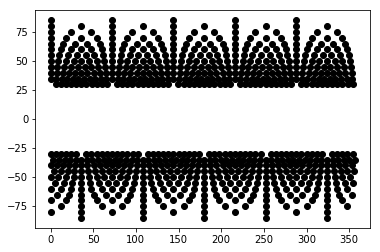

In [26]:
plt.plot(np.degrees(cap_ras), np.degrees(cap_decs), 'ko')
plt.plot(np.degrees((np.array(cap_ras)+np.pi) % (2.*np.pi)), np.degrees(-np.array(cap_decs)), 'ko')


In [ ]:
# final step, also add the pentagon positions


1.5707963267948966